## Iris dataset EDA

#### 1 - Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
#Load Dataset
path = 'F:\Projects EDA\Datasets\Iris_1.csv'
df = pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### 2 - Initial Data Inspection

In [4]:
print("Dataset Shape: ", df.shape)
print("\nData Information: ", df.info())
print("\nSummary Statistics: ", display(df.describe(include='all')))
print("\nSpecies Distribution: ", df['Species'].value_counts())

Dataset Shape:  (150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB

Data Information:  None


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN



Summary Statistics:  None

Species Distribution:  Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


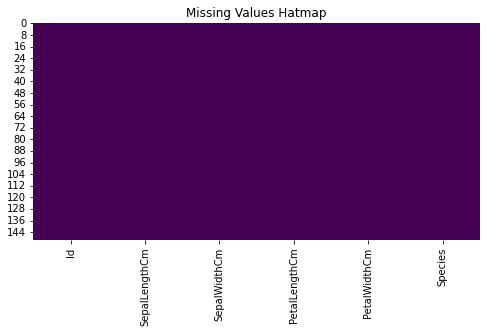

In [5]:
#Check Missing Values
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Hatmap")
plt.show()

 #### 3 - Data Cleaning & Preprocessing

In [7]:
#Encode species to Numerical values
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


#### 4 - Univariate Analysis

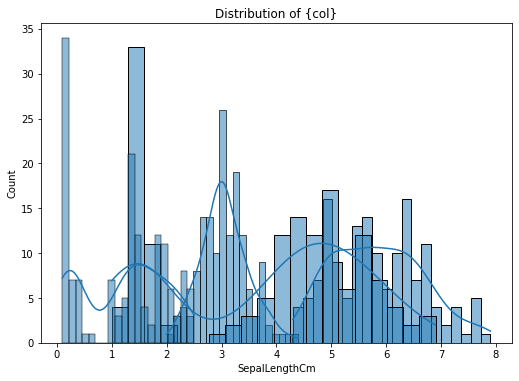

In [11]:
#Numerical Features
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(14,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title("Distribution of {col}")
plt.tight_layout()
plt.show()

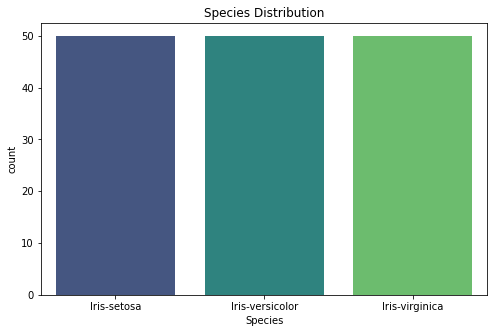

In [14]:
# Categorical Features
plt.figure(figsize=(8,5))
sns.countplot(x="Species", data=df, palette="viridis")
plt.title("Species Distribution")
plt.show()

#### 5 - Bivariate Analysis

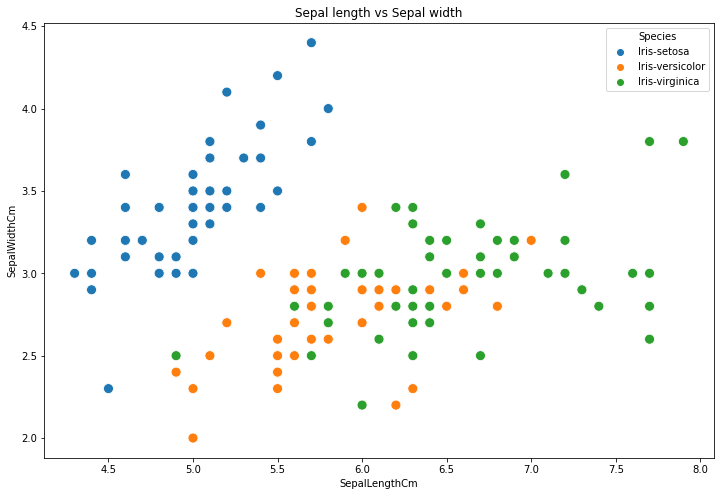

In [24]:
#Scatter plots for Feature Relationships
# Categorical Features
plt.figure(figsize=(12,8))
sns.scatterplot(x="SepalLengthCm", y='SepalWidthCm', hue='Species', data=df, s=100)
plt.title("Sepal length vs Sepal width")
plt.show()


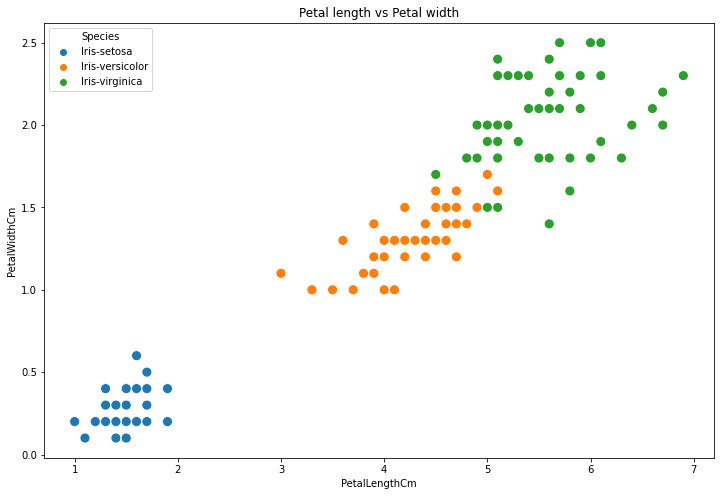

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="PetalLengthCm", y='PetalWidthCm', hue='Species', data=df, s=100)
plt.title("Petal length vs Petal width")
plt.show()

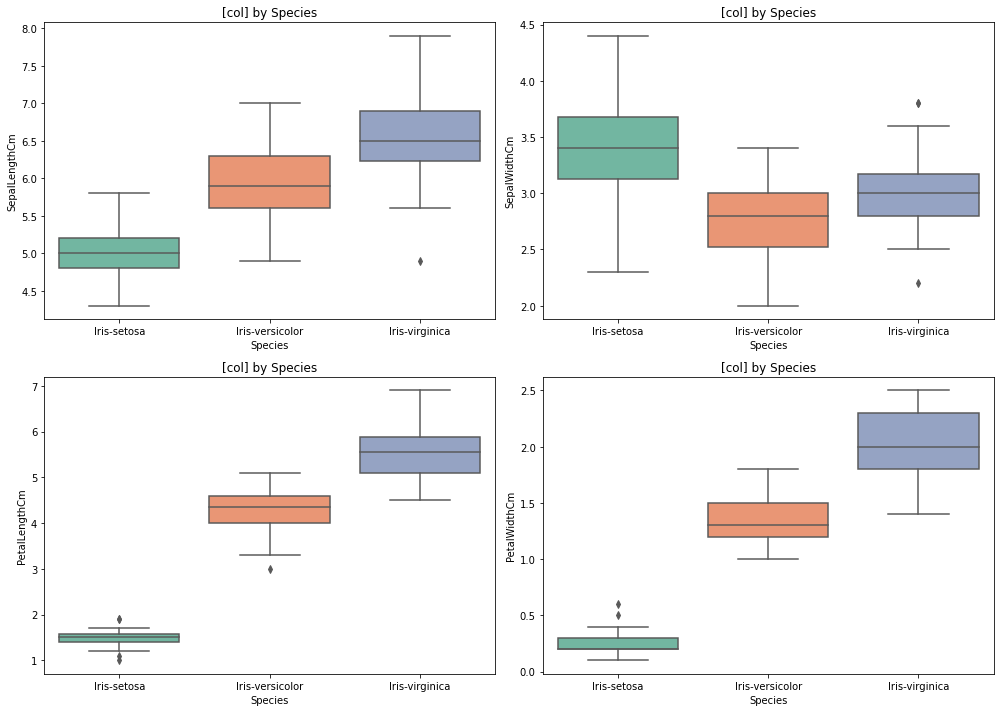

In [20]:
#Boxplots by species
plt.figure(figsize=(14,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x="Species", y=col, data=df, palette='Set2')
    plt.title(f'[col] by Species')
plt.tight_layout()
plt.show()

#### 6 - Multivariate Analysis

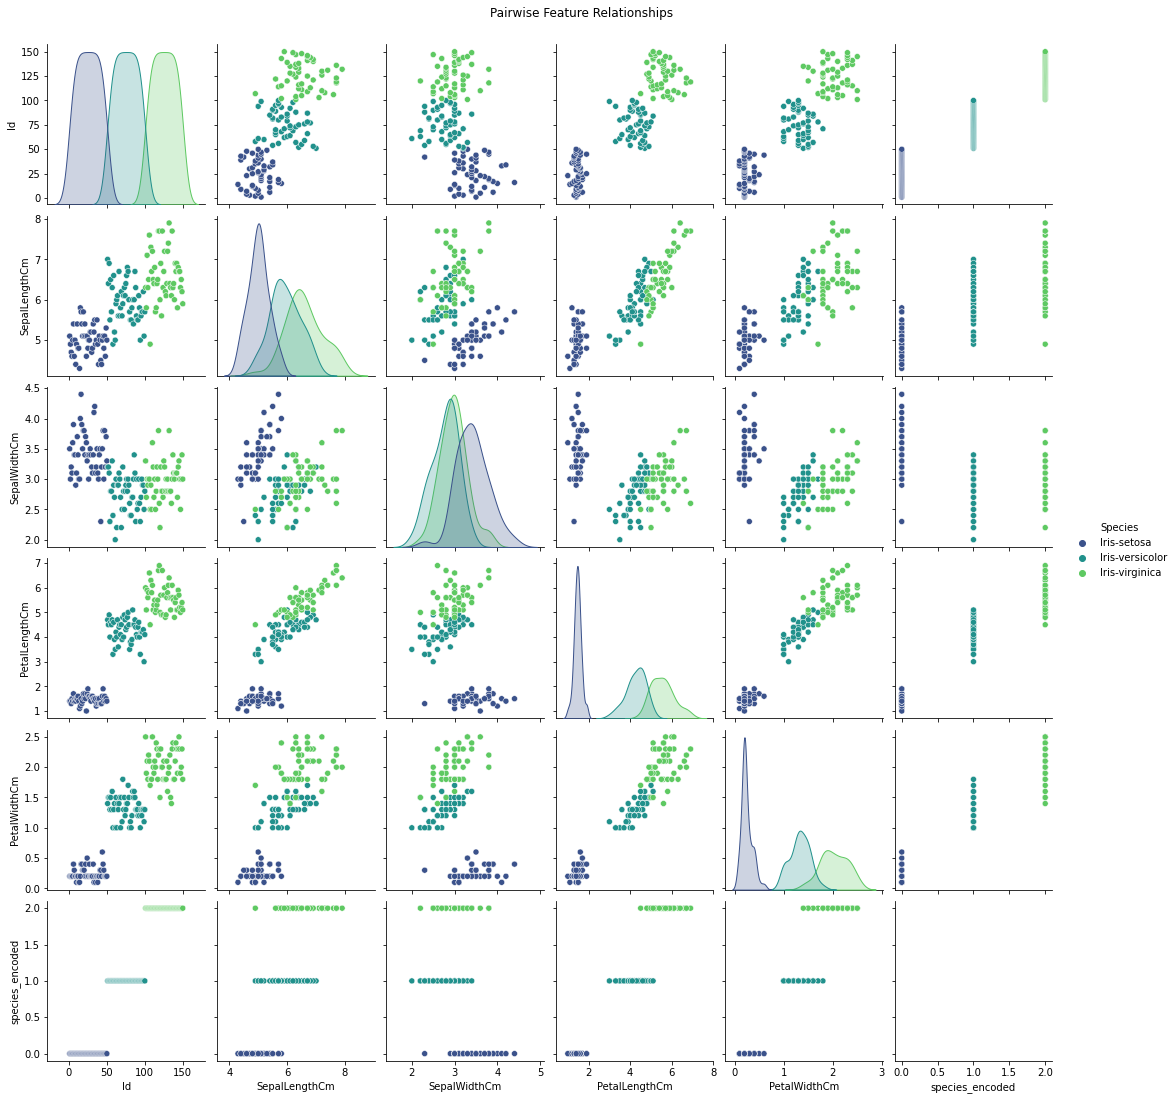

In [21]:
#Pairplot for all feature relationships
sns.pairplot(df, hue='Species', palette='viridis', height=2.5)
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

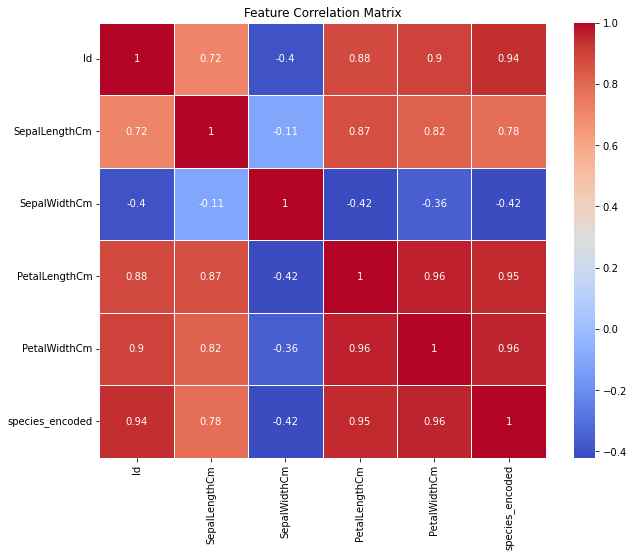

In [22]:
# Correlation Heatmap
plt.figure(figsize=(10,8)) 
corr_matrix = df.corr()     #numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

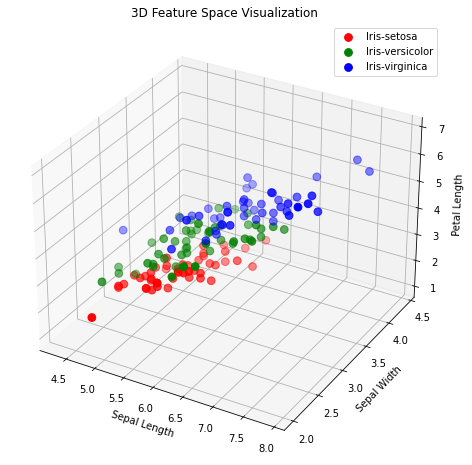

In [26]:
# 3D Plot (requires mpl_toolkits)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}

for species, group in df.groupby('Species'):
    ax.scatter(group['SepalLengthCm'],
               group['SepalWidthCm'],
               group['PetalLengthCm'], 
               c=colors[species],
               label=species,
               s=60)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Feature Space Visualization')
ax.legend()
plt.show()

#### 7 - Key Insights

In [27]:
print("\n--- Key Insights ---")
print("1. Setosa species has distinct characteristics: smallest petals, largest sepal width")
print("2. Petal measurements (length/width) are most effective for species classification")
print("3. Strong positive correlation between petal_length and petal_width (r=0.96)")
print("4. Virginica has largest petals but most variation in sepal widthr")
print("5. Versicolor shows intermediate characteristics between other species")


--- Key Insights ---
1. Setosa species has distinct characteristics: smallest petals, largest sepal width
2. Petal measurements (length/width) are most effective for species classification
3. Strong positive correlation between petal_length and petal_width (r=0.96)
4. Virginica has largest petals but most variation in sepal widthr
5. Versicolor shows intermediate characteristics between other species
